In [1]:
# from utils import *
from fastai2.vision.all import *
from nbdev.showdoc import *
from ipywidgets import widgets
from pandas.api.types import CategoricalDtype

import matplotlib as mpl
# mpl.rcParams['figure.dpi']= 200
mpl.rcParams['savefig.dpi']= 200
mpl.rcParams['font.size']=12

set_seed(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
pd.set_option('display.max_columns',999)
np.set_printoptions(linewidth=200)
torch.set_printoptions(linewidth=200)

from fastai2.vision.widgets import *

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
path = Path('../../rf-chess-data/cropped_v1/')
fns = get_image_files(path)  # works recursively, to each subfolder

# failed = verify_images(fns)

In [4]:
fns[:3]

(#3) [Path('../../rf-chess-data/cropped_v1/02323_white-pawn.jpg'),Path('../../rf-chess-data/cropped_v1/00960_black-rook.jpg'),Path('../../rf-chess-data/cropped_v1/02432_black-rook.jpg')]

In [5]:
def piece_class_parse(fn): 
    fn = fn.split('_')[1]
    fn = fn.split('.')[0]
    return fn

In [14]:
pieces = ImageDataLoaders.from_name_func(
                path, 
                get_image_files(path),
                valid_pct=0.2, 
                seed=42,
                label_func=piece_class_parse, 
#                 item_tfms=Resize(128),
                item_tfms=RandomResizedCrop(128, min_scale=0.5),
                batch_tfms=aug_transforms(),
                )

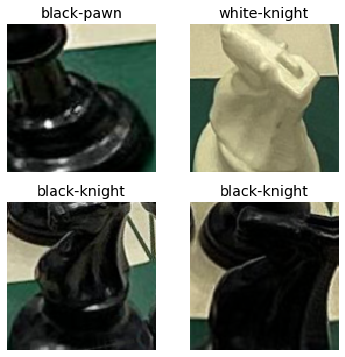

In [17]:
pieces.show_batch(max_n=4)

In [19]:
learn = cnn_learner(pieces, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.692937,0.184626,0.047038,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.361239,0.126910,0.031359,00:05
1,0.250677,0.096145,0.019164,00:05
2,0.183771,0.083168,0.010453,00:05
3,0.141690,0.089129,0.012195,00:05


##### Evaluation

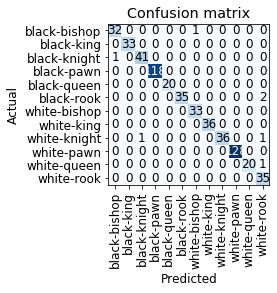

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

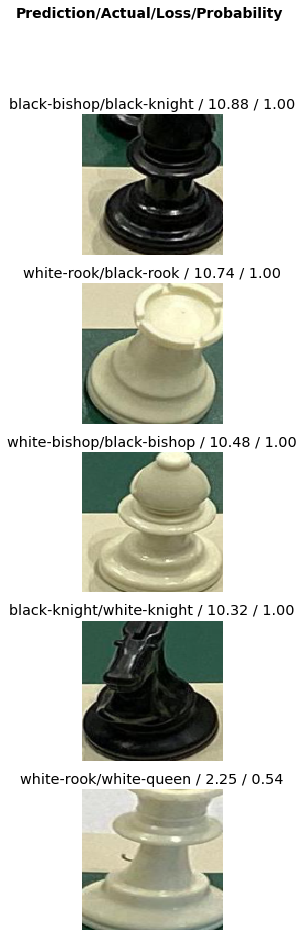

In [21]:
interp.plot_top_losses(5, nrows=5)

In [22]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
cleaner.